In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv("data/StudentsPerformance.csv")

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.info()
# 5 Categorical Column
# 3 Numerical Column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.isnull().sum()

# No missing value

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [15]:
df.duplicated().sum()

# No Duplicate Value

0

In [29]:
categorical_column = [col for col in df.columns if df[col].dtype=="O"]
numerical_column = [col for col in df.columns if df[col].dtype!="O"]

In [47]:
for col in categorical_column:
    print(df[col].value_counts())
    print()
    print("*"*50)

gender
female    518
male      482
Name: count, dtype: int64

**************************************************
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

**************************************************
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

**************************************************
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

**************************************************
test preparation course
none         642
completed    358
Name: count, dtype: int64

**************************************************


In [49]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [51]:
df['Total_Score'] = df['math score']+df['reading score']+df['writing score']

In [55]:
df['Average_Score'] = df['Total_Score'] /3

In [59]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='Average_Score', ylabel='Count'>

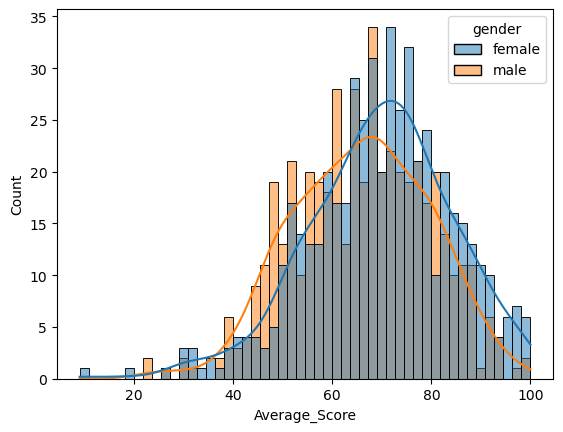

In [105]:
sns.histplot(x='Average_Score',bins=50,data=df,hue='gender',kde=True)

<Axes: xlabel='Total_Score', ylabel='Count'>

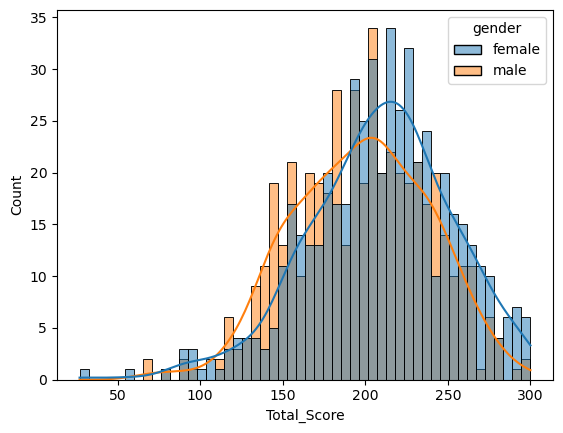

In [103]:
sns.histplot(x='Total_Score',bins=50,data=df,hue='gender',kde=True)

In [107]:
df.to_csv("data/Student_Performace_EDA.csv")